In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
marginalize = 1
data_dir = f"your root of saving data"
fake_dir = f"your root of marginalzied data seed1_[{str(marginalize)}]"
fake_dir2 = f"your root of marginalzied data seed2_[{str(marginalize)}]"
fake_dir3 = f"your root of marginalzied data seed3_[{str(marginalize)}]"

In [11]:
data_lists = os.listdir(fake_dir)
data_rs = []
for i, data_r in enumerate(data_lists):
    if ".npy" in data_r and "npy_real.npy" not in data_r:
        data_rs.append(data_r)

data_index = 2
fake_data = np.squeeze(np.load(os.path.join(fake_dir, data_rs[data_index])))
fake_data2 = np.squeeze(np.load(os.path.join(fake_dir2, data_rs[data_index])))
fake_data3 = np.squeeze(np.load(os.path.join(fake_dir3, data_rs[data_index])))
real_data = np.squeeze(np.load(os.path.join(fake_dir, data_rs[data_index].replace("npy", "npy_real.npy"))))
print(fake_data.shape, real_data.shape)

(4, 256, 256, 256) (4, 256, 256, 256)


/ocean/projects/asc170022p/yanwuxu/miniconda/envs/DG_medical/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("rainbow").copy()
  


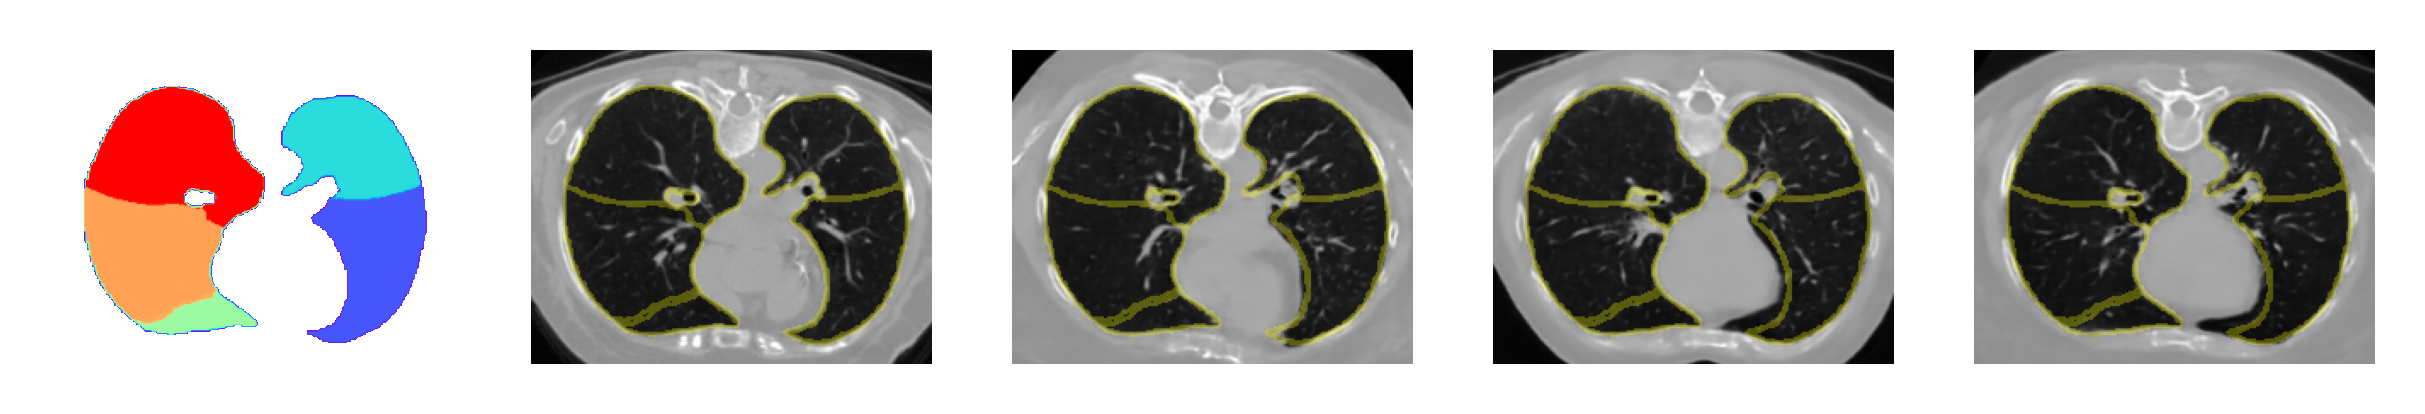

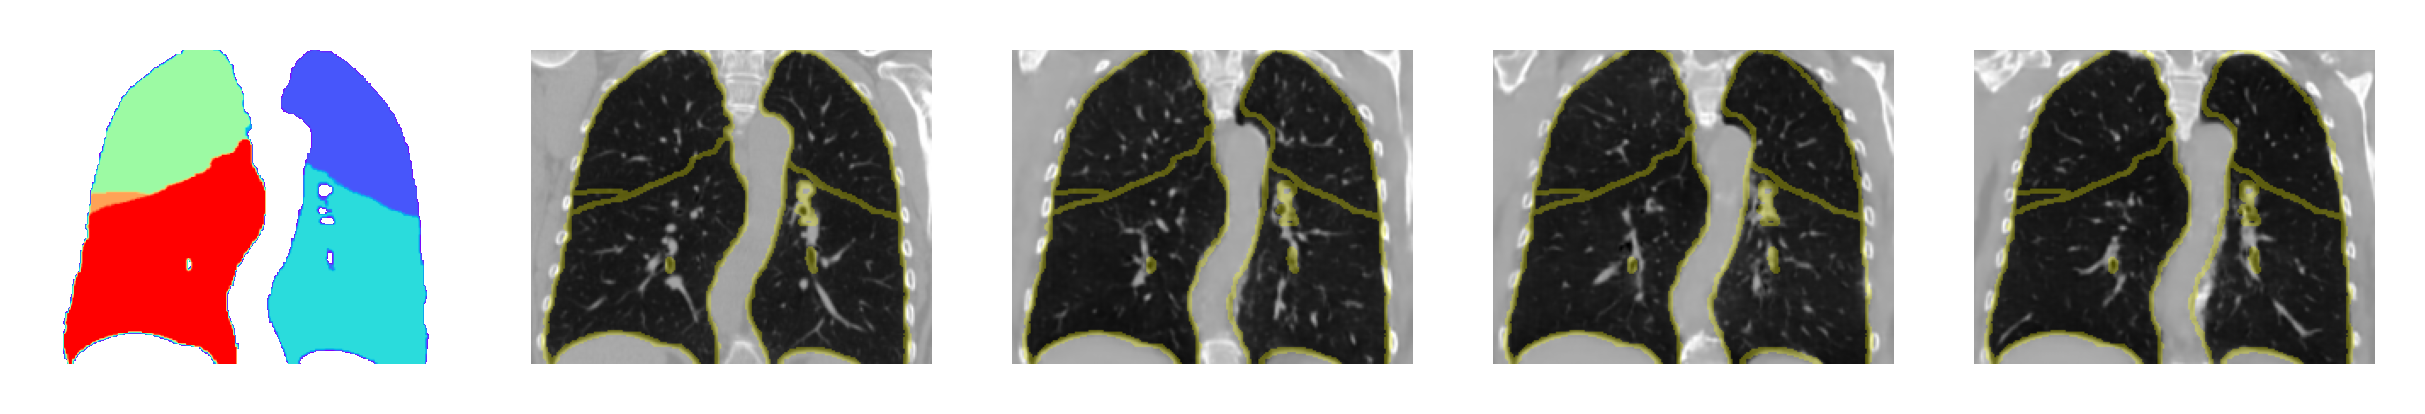

In [ ]:
from skimage import segmentation

index = 128

cmap = plt.get_cmap('rainbow')
cmap.set_under('white')

thresh = 0.1
# set colourbar map
cmap_args = dict(cmap=cmap, vmin=thresh, vmax=1, alpha=0.1)

imgs = [real_data, fake_data, fake_data2, fake_data3]

fig, axs = plt.subplots(nrows=1, ncols=5, dpi=500)

seg = real_data[marginalize, index, 25:210,10:246]
axs[0].imshow(seg,cmap=cmap, vmin=thresh, vmax=1,)
axs[0].axis("off")

for i, fake_data in enumerate(imgs):
    fake_data_c = fake_data[0,index,...]
    fake_img_c = fake_data_c[25:210,10:246]
    # axs[i+1].imshow(fake_img_c, cmap="gray")
    # axs[i+1].imshow(seg, **cmap_args)
    result_image = segmentation.mark_boundaries(fake_img_c, seg, mode='thick')
    result_image = result_image*0.3 + np.expand_dims(fake_img_c, axis=-1)*0.7
    axs[i+1].imshow(result_image)
    axs[i+1].axis("off")

################
index = 100
fig, axs = plt.subplots(nrows=1, ncols=5, dpi=500)

seg = real_data[marginalize, ...]
seg  = np.flip(seg, axis=0)[25:210,index,10:246]
axs[0].imshow(seg,cmap=cmap, vmin=thresh, vmax=1,)
axs[0].axis("off")

for i, fake_data in enumerate(imgs):
    fake_img = fake_data[0, ...]
    fake_img_c = np.flip(fake_img, axis=0)[25:210,index,10:246]
    # axs[i+1].imshow(fake_img_c*0.9, cmap="gray")
    # axs[i+1].imshow(seg, **cmap_args)
    result_image = segmentation.mark_boundaries(fake_img_c, seg, mode='thick')
    result_image = result_image*0.3 + np.expand_dims(fake_img_c, axis=-1)*0.7
    axs[i+1].imshow(result_image)
    axs[i+1].axis("off")
   

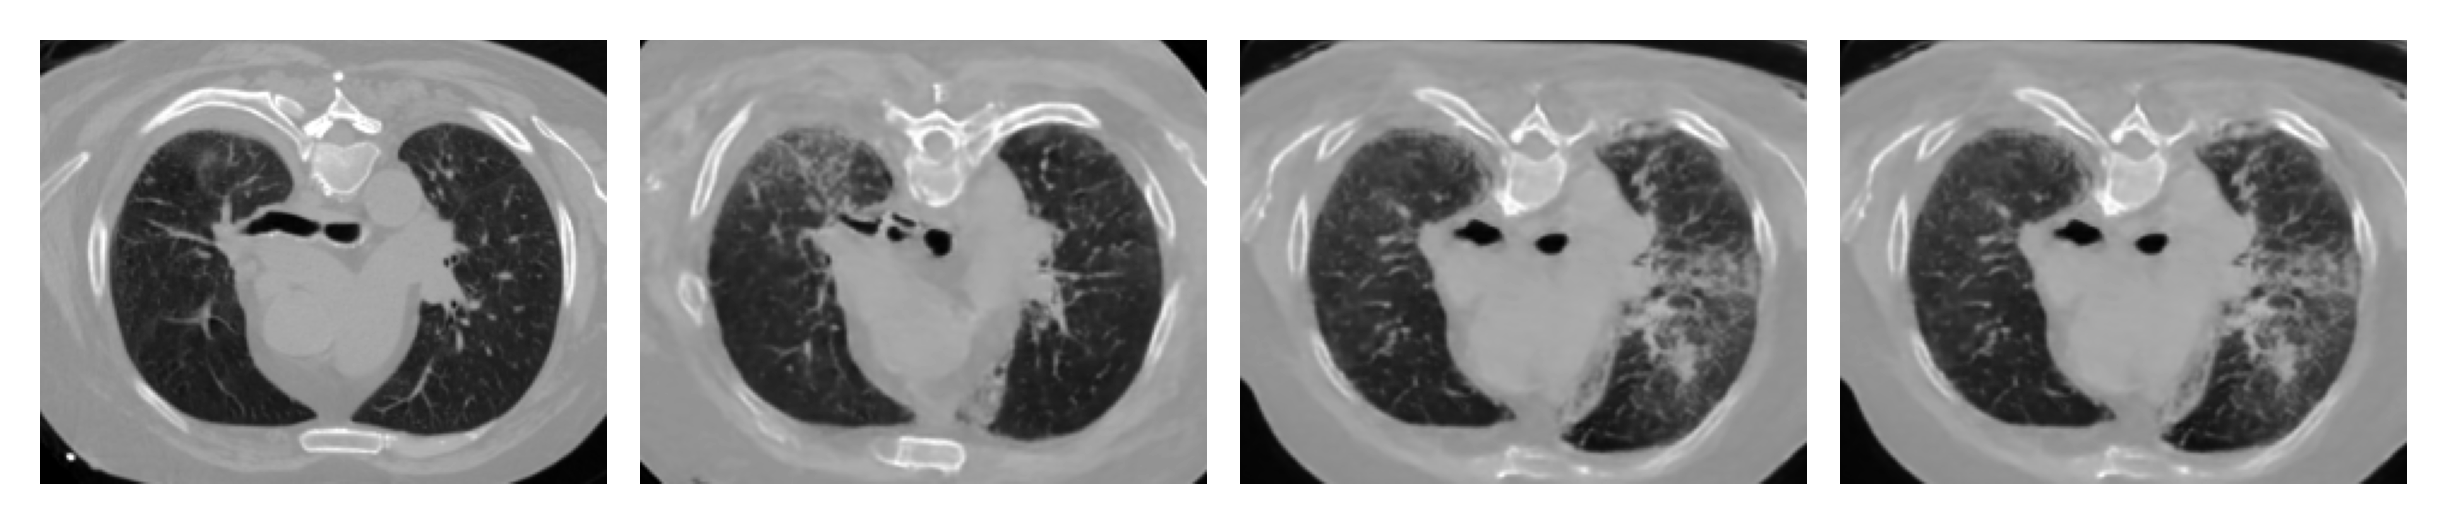

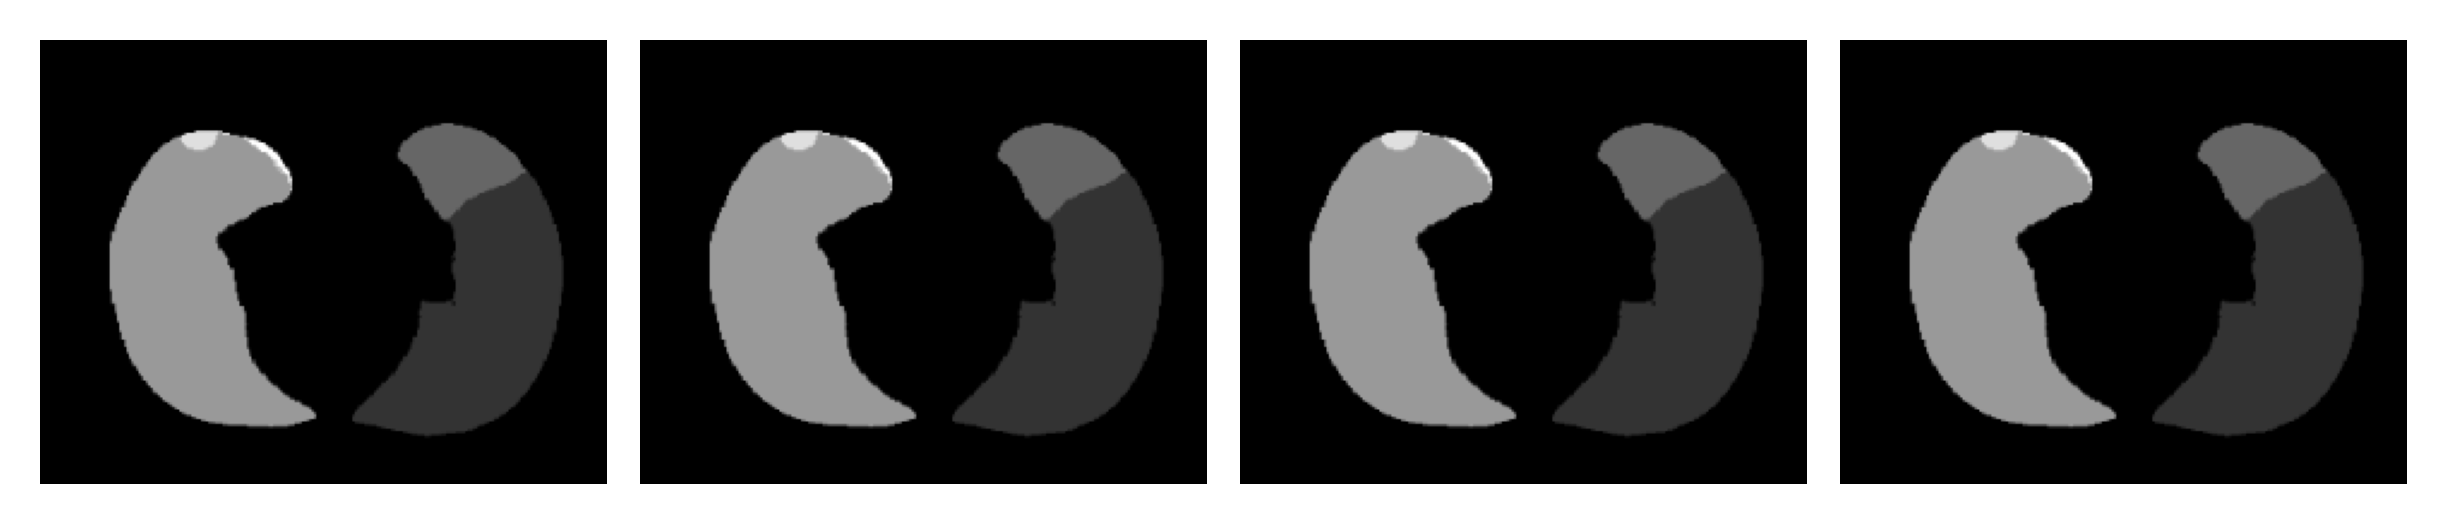

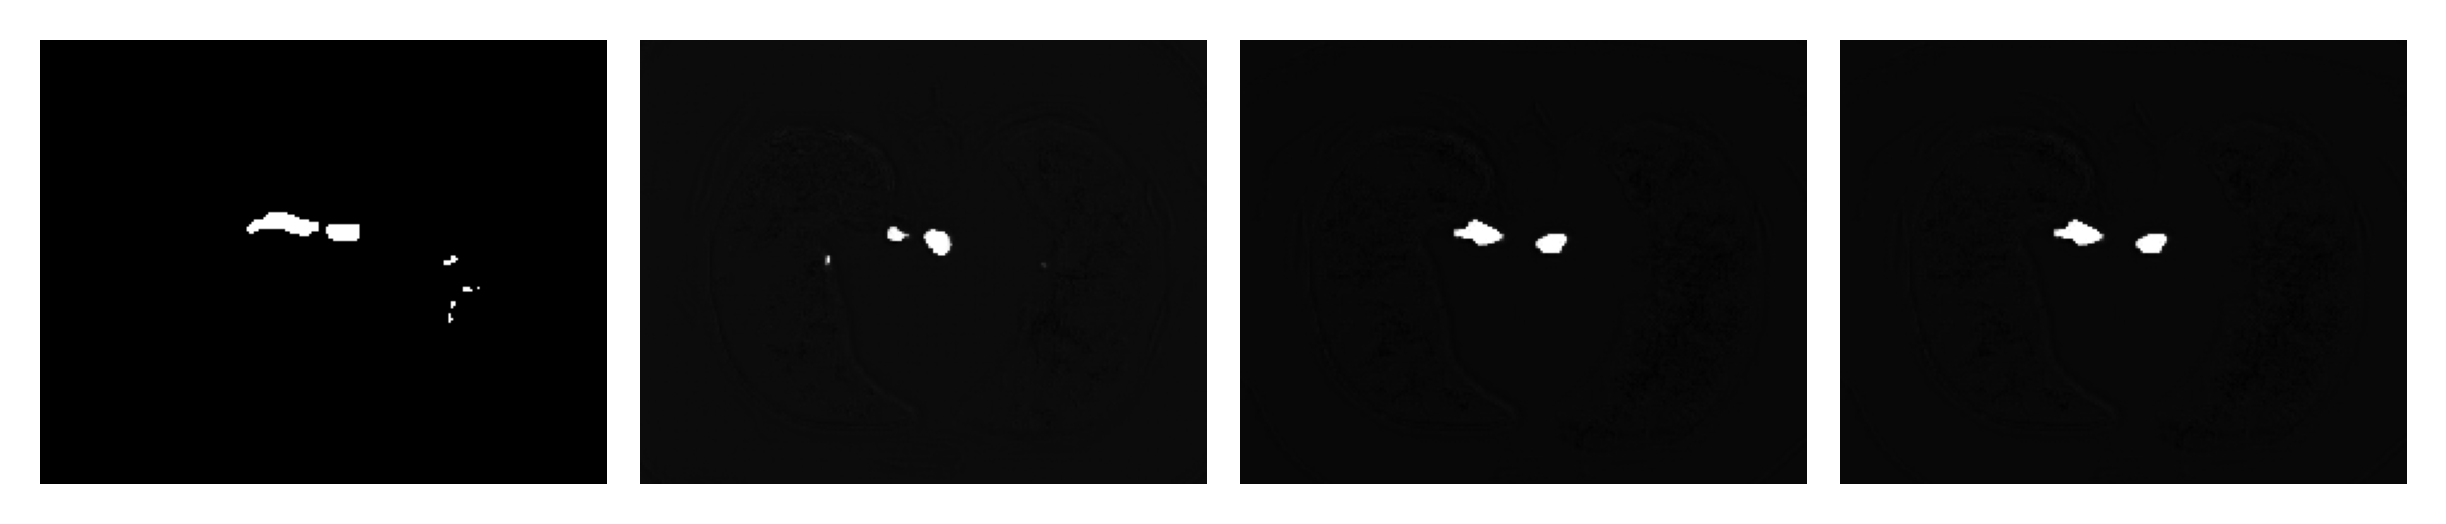

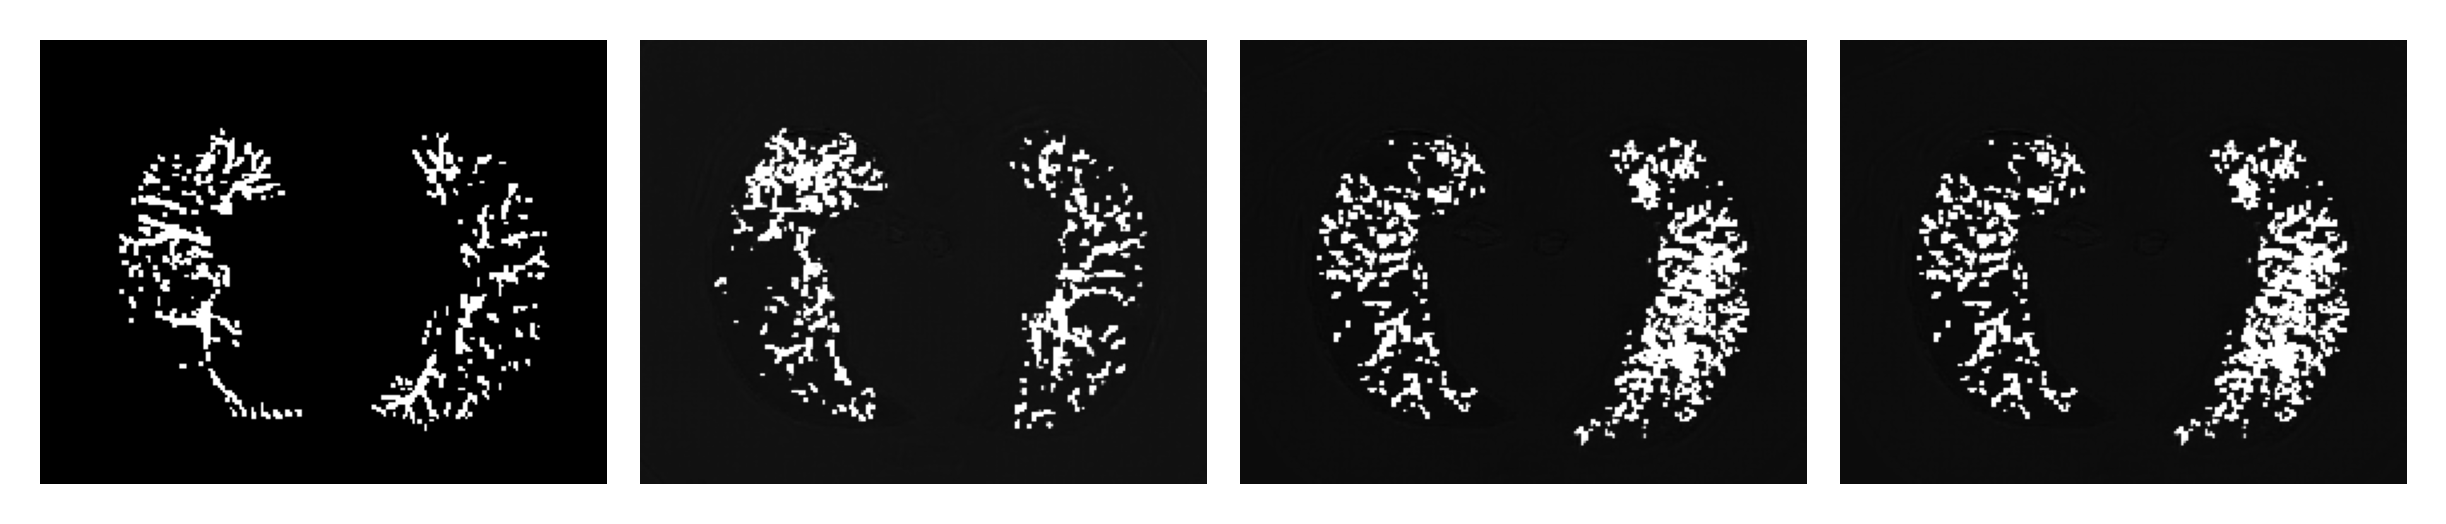

In [5]:
index = 144
fake_data_c = fake_data[:,index,25:210,10:246]
fake_img_c = fake_data_c[0, ...]

fake_data2_c = fake_data2[:,index,25:210,10:246]
fake_img2_c = fake_data2_c[0, ...]

fake_data3_c = fake_data3[:,index,25:210,10:246]
fake_img3_c = fake_data3_c[0, ...]

real_data_c = real_data[:,index,25:210,10:246]
real_img_c = real_data_c[0, ...]

for i in range(4):
    fig, axs = plt.subplots(1,4, dpi=400, constrained_layout=True)
    fake_img_c = fake_data_c[i, ...]
    fake_img2_c = fake_data2_c[i, ...]
    fake_img3_c = fake_data3_c[i, ...]
    real_img_c = real_data_c[i, ...]
    axs[3].imshow(fake_img_c, cmap="gray")
    axs[3].axis("off")

    axs[1].imshow(fake_img2_c, cmap="gray")
    axs[1].axis("off")

    axs[2].imshow(fake_img3_c, cmap="gray")
    axs[2].axis("off")

    axs[0].imshow(real_img_c, cmap="gray")
    axs[0].axis("off")